In [134]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [132]:
data_path = '../data/'
df = pd.read_csv(data_path + 'final_merged_dataset.csv')
df['Unnamed: 0'] = [i for i in range(len(df))]
df

,Unnamed: 0,tweet,label
0,0,RT @LegendaryEnergy: Just two weeks of Coronav...,0
1,1,RT @OldClassicBrown: If you have ever been her...,0
2,2,RT @hollaa_backk: if you’ve ever used a frat h...,0
3,3,RT @TMe1official: Cocaine cures corona virus!!...,0
4,4,RT @DeplrbleRzistr: It’s almost as if a whole ...,0
...,...,...,...
31996,31996,https://t.co/inx3HTRcfR Smell Diminishes by Da...,1
31997,31997,COVID-19 outbreak on the Diamond Princess crui...,1
31998,31998,Coronavirus China Italy | Coronavirus Outbreak...,1
31999,31999,"Coronavirus Daily Digest: April 13, 2020\nhttp...",1


In [10]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [16]:
emoji_pattern

re.compile(r'[😀-🙏🌀-🗿🚀-\U0001f6ff\U0001f1e0-🇿]+', re.UNICODE)

In [96]:
df["tweet"] = df["tweet"].apply(lambda row : re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", str(row))) # no URL
df["tweet"] = df["tweet"].apply(lambda row : re.sub(r"RT ", "", str(row))) # no @
df["tweet"] = df["tweet"].apply(lambda row : emoji_pattern.sub(r"", row)) # no emoji

In [135]:
stopwords = set(stopwords.words('english'))

In [136]:
def basic_preprocess(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text if not word.lower() in stopwords]
    return ' '.join(text)

In [137]:
df["tweet"] = df["tweet"].apply(basic_preprocess)

In [138]:
df

,Unnamed: 0,tweet,label
0,0,rt @ legendaryenergy : two weeks coronavirus m...,0
1,1,"rt @ oldclassicbrown : ever , congratulations ...",0
2,2,rt @ hollaa_backk : ’ ever used frat house bat...,0
3,3,rt @ tme1official : cocaine cures corona virus...,0
4,4,rt @ deplrblerzistr : ’ almost whole lot ameri...,0
...,...,...,...
31996,31996,https : //t.co/inx3htrcfr smell diminishes day...,1
31997,31997,covid-19 outbreak diamond princess cruise ship...,1
31998,31998,coronavirus china italy | coronavirus outbreak...,1
31999,31999,"coronavirus daily digest : april 13 , 2020 htt...",1


(array([14485.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17295.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

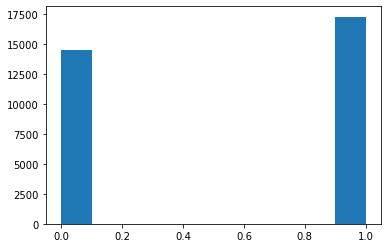

In [99]:
plt.hist(Y)

In [149]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

X = df['tweet']
Y = df['label']

vectorizer = CountVectorizer(max_features = 200)
tfidf = TfidfTransformer()
X = vectorizer.fit_transform(X)
X_array = X.toarray()

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [150]:
nb = GaussianNB()
lr = LogisticRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X_array,Y)

In [73]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66993023],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [151]:
nb.fit(X_train,Y_train)
Y_pred = nb.predict(X_test)

In [152]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71      3568
           1       0.74      0.93      0.82      4433

    accuracy                           0.78      8001
   macro avg       0.80      0.76      0.76      8001
weighted avg       0.80      0.78      0.77      8001



In [153]:
print(confusion_matrix(Y_test,Y_pred))

[[2129 1439]
 [ 327 4106]]
